<a href="https://colab.research.google.com/github/Ash100/Minor/blob/main/sG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
from Bio import SeqIO

# Function to upload and load a sequence from a FASTA file
def upload_and_load_sequence():
    uploaded = files.upload()  # This will prompt the file upload
    file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
    record = SeqIO.read(file_name, "fasta")  # Load the sequence
    return record

In [4]:
print("Upload your gene sequence:")
user_sequence_record = upload_and_load_sequence()  # Load the user's gene sequence

# Display sequences
print(f"User Sequence: {user_sequence_record.seq}")

Upload your gene sequence:


Saving My_seq.txt to My_seq.txt
User Sequence: ACACTCGGGGGCCTGCCCGCCTCTCAAATGCCCATATATGGACATGATGCAGGCCACCTGGCCATGGTTTGTGAGGTCCCAGCCCCTTTGCCCTCACAATGACCAACGGCCCCCTGGCATCTATAACAGGCCGCAGAGCTGGCCCCTGACTCACAGCCCACAGAGTTCCACCTGCTCACAGGTTGGCTGGCTCAGCCAAGGTGGTGCCCTGCTCTGAGCATTCAGGCCAAGCCCATCCTGCACCATGGCCAGGTACAGATGCTGTCGCAGCCAGAGCCGGAGCAGATATTACCGCCAGAGACAAAGAAGTCGCAGACGAAGGAGGCGGAGCTGCCAGACACGGAGGAGAGCCATGAGTAAGTGGGCCCAGCTGAGGGTGGGCTGGGGCTGAGGCTGGGAGCTCTCAGGGCCCAGCCTTCCTCTCACCACTTTTCTTGGTCTCACCAGGGTGCTGCCGCCCCAGGTACAGACCGAGATGTAGAAGACACTAATTGCACAAAATAGCACATCCACCAAACTCCTGCCTGAGAATGTTACCAGACTTCAAGATCCTCTTGCCACATCTTGAAAATGCCACCATCCAATAAAAATGAGGAGGGTGCTAAGGAACAA


In [5]:
print("Upload the reference sequence:")
reference_sequence_record = upload_and_load_sequence()  # Load the reference sequence

# Display sequences
print(f"Reference Sequence: {reference_sequence_record.seq}")

Upload the reference sequence:


Saving myref.txt to myref.txt
Reference Sequence: ACACTCGGGGGCCTGCCCGCCTCTCAAATGCCCATATATGGACATGATGCAGGCCACCTGGCCATGGTTTGTGAGGTCCCAGCCCCTTTGCCCTCACAATGACCAACGGCCCCCTGGCATCTATAACAGGCCGCAGAGCTGGCCCCTGACTCACAGCCCACAGAGTTCCACCTGCTCACAGGTTGGCTGGCTCAGCCAAGGTGGTGCCCTGCTCTGAGCATTCAGGCCAAGCCCATCCTGCACCATGGCCAGGTACAGATGCTGTCGCAGCCAGAGCCGGAGCAGATATTACCGCCAGAGACAAAGAAGTCGCAGACGAAGGAGGCGGAGCTGCCAGACACGGAGGAGAGCCATGAGTAAGTGGGCCCAGCTGAGGGTGGGCTGGGGCTGAGGCTGGGAGCTCTCAGGGCCCAGCCTTCCTCTCACCACTTTTCTTGGTCTCACCAGGGTGCTGCCGCCCCAGGTACAGACCGAGATGTAGAAGACACTAATTGCACAAAATAGCACATCCACCAAACTCCTGCCTGAGAATGTTACCAGACTTCAAGATCCTCTTGCCACATCTTGAAAATGCCACCATCCAATAAAAATCAGGAGCCTGCTAAGGAACAA


In [12]:
from google.colab import files
from Bio import SeqIO, pairwise2
from Bio.Seq import Seq

# Function to upload and load a sequence from a FASTA file
def upload_and_load_sequence():
    uploaded = files.upload()  # Prompt the file upload
    file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
    record = SeqIO.read(file_name, "fasta")  # Load the sequence from FASTA
    return str(record.seq)  # Return the sequence as a string

# Upload and load the user sequence
print("Upload your gene sequence:")
user_sequence = upload_and_load_sequence()

# Upload and load the reference sequence
print("Upload the reference sequence:")
reference_sequence = upload_and_load_sequence()

# Perform global alignment using pairwise2
def align_sequences(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
    return alignments[0]  # Return the best alignment

def pretty_print_alignment(alignment):
    aligned_seq1, aligned_seq2, score, begin, end = alignment
    alignment_string = []

    # Build alignment string showing matches, mismatches, insertions, and deletions
    for base1, base2 in zip(aligned_seq1, aligned_seq2):
        if base1 == base2:
            alignment_string.append('|')  # Match
        elif base1 == '-' or base2 == '-':
            alignment_string.append(' ')  # Gap (Insertion/Deletion)
        else:
            alignment_string.append('*')  # Mismatch

    # Print the aligned sequences and the comparison line
    print("\nAlignment result:")
    print(aligned_seq1)
    print("".join(alignment_string))  # Show matching markers
    print(aligned_seq2)
    print(f"Score: {score}")

# Perform alignment and pretty print the result
alignment = align_sequences(user_sequence, reference_sequence)
pretty_print_alignment(alignment)

Upload your gene sequence:


Saving My_seq.txt to My_seq.txt
Upload the reference sequence:


Saving myref.txt to myref.txt

Alignment result:
ACACTCGGGGGCCTGCCCGCCTCTCAAATGCCCATATATGGACATGATGCAGGCCACCTGGCCATGGTTTGTGAGGTCCCAGCCCCTTTGCCCTCACAATGACCAACGGCCCCCTGGCATCTATAACAGGCCGCAGAGCTGGCCCCTGACTCACAGCCCACAGAGTTCCACCTGCTCACAGGTTGGCTGGCTCAGCCAAGGTGGTGCCCTGCTCTGAGCATTCAGGCCAAGCCCATCCTGCACCATGGCCAGGTACAGATGCTGTCGCAGCCAGAGCCGGAGCAGATATTACCGCCAGAGACAAAGAAGTCGCAGACGAAGGAGGCGGAGCTGCCAGACACGGAGGAGAGCCATGAGTAAGTGGGCCCAGCTGAGGGTGGGCTGGGGCTGAGGCTGGGAGCTCTCAGGGCCCAGCCTTCCTCTCACCACTTTTCTTGGTCTCACCAGGGTGCTGCCGCCCCAGGTACAGACCGAGATGTAGAAGACACTAATTGCACAAAATAGCACATCCACCAAACTCCTGCCTGAGAATGTTACCAGACTTCAAGATCCTCTTGCCACATCTTGAAAATGCCACCATCCAATAAAAATG-AGGAGGG--TGCTAAGGAACAA
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

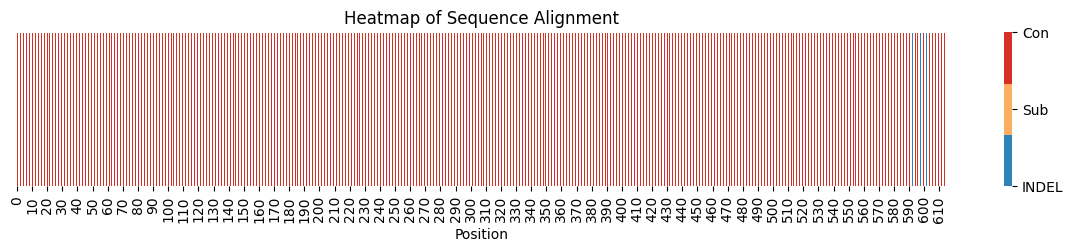

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import pairwise2
from google.colab import files
from Bio import SeqIO

# Create a matrix for heatmap visualization
alignment_matrix = []

# Build matrix: 1 for match, 0 for mismatch, -1 for gap (INDEL)
for base1, base2 in zip(aligned_user_seq, aligned_ref_seq):
    if base1 == base2:
        alignment_matrix.append(1)  # Match
    elif base1 == '-' or base2 == '-':
        alignment_matrix.append(-1)  # Gap (INDEL)
    else:
        alignment_matrix.append(0)  # Mismatch (substitution)

# Convert to 2D array for heatmap
heatmap_data = np.array(alignment_matrix).reshape(1, -1)  # Single row, many columns

# Custom color mapping: Blue for match, Red for substitution, Gray for INDEL (gap)
cmap = sns.color_palette(["#2b83ba", "#fdae61", "#d73027"])  # Match, Substitution, INDEL

# Generate the heatmap
plt.figure(figsize=(15, 2))  # Adjust the size of the heatmap
ax = sns.heatmap(heatmap_data, cmap=cmap, cbar=True, linewidths=0.5, annot=False)

# Customize the color bar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1, 0, 1])  # Set the ticks corresponding to the values -1, 0, and 1
colorbar.set_ticklabels(['INDEL', 'Sub', 'Con'])  # Assign labels to the ticks

# Display the heatmap
plt.title("Heatmap of Sequence Alignment")
plt.xlabel("Position")
plt.yticks([])  # Remove y-axis ticks since it's a single row
plt.savefig("alignment.png", dpi=600, bbox_inches='tight')
plt.show()

In [23]:
def detect_changes_in_gene(aligned_gene_seq, aligned_ref_seq):
    substitutions = []
    insertions = []
    deletions = []

    for i, (base_gene, base_ref) in enumerate(zip(aligned_gene_seq, aligned_ref_seq)):
        if base_gene != base_ref:
            if base_gene == '-':
                insertions.append((i, base_ref))  # Insertion in reference sequence (gap in gene)
            elif base_ref == '-':
                deletions.append((i, base_gene))  # Deletion in gene sequence (gap in reference)
            else:
                substitutions.append((i, base_gene, base_ref))  # Substitution between gene and reference

    return substitutions, insertions, deletions

# Example of detecting changes in your gene sequence
aligned_gene_seq, aligned_ref_seq = alignment[0], alignment[1]
substitutions, insertions, deletions = detect_changes_in_gene(aligned_gene_seq, aligned_ref_seq)

# Display substitutions, insertions, and deletions with detailed information
print("Substitutions detected in your gene sequence:")
for position, gene_base, ref_base in substitutions:
    print(f"Position {position}: {gene_base} -> {ref_base}")

print("\nInsertions detected in your gene sequence:")
for position, ref_base in insertions:
    print(f"Position {position}: Insertion of {ref_base}")

print("\nDeletions detected in your gene sequence:")
for position, gene_base in deletions:
    print(f"Position {position}: Deletion of {gene_base}")

Substitutions detected in your gene sequence:

Insertions detected in your gene sequence:
Position 592: Insertion of C
Position 600: Insertion of C
Position 601: Insertion of C

Deletions detected in your gene sequence:
Position 591: Deletion of G
Position 597: Deletion of G
Position 598: Deletion of G


In [21]:
from Bio.Seq import Seq

# Function to generate all six frames
def translate_six_frames(sequence):
    frames = []
    # Forward frames
    for frame in range(3):
        frames.append(Seq(sequence[frame:]).translate(to_stop=False))

    # Reverse complement frames
    reverse_seq = Seq(sequence).reverse_complement()
    for frame in range(3):
        frames.append(Seq(reverse_seq[frame:]).translate(to_stop=False))

    return frames

# Example: Translate both user and reference sequences into all six frames
user_frames = translate_six_frames(user_sequence)
reference_frames = translate_six_frames(reference_sequence)

# Display all six frames for both sequences
for i in range(6):
    print(f"User Frame {i+1}: {user_frames[i]}")
    print(f"Reference Frame {i+1}: {reference_frames[i]}")
    print("="*40)

# Now, you can select the correct frame based on your analysis.

User Frame 1: TLGGLPASQMPIYGHDAGHLAMVCEVPAPLPSQ*PTAPWHL*QAAELAPDSQPTEFHLLTGWLAQPRWCPALSIQAKPILHHGQVQMLSQPEPEQILPPETKKSQTKEAELPDTEESHE*VGPAEGGLGLRLGALRAQPSSHHFSWSHQGAAAPGTDRDVEDTNCTK*HIHQTPA*ECYQTSRSSCHILKMPPSNKNEEGAKEQ
Reference Frame 1: TLGGLPASQMPIYGHDAGHLAMVCEVPAPLPSQ*PTAPWHL*QAAELAPDSQPTEFHLLTGWLAQPRWCPALSIQAKPILHHGQVQMLSQPEPEQILPPETKKSQTKEAELPDTEESHE*VGPAEGGLGLRLGALRAQPSSHHFSWSHQGAAAPGTDRDVEDTNCTK*HIHQTPA*ECYQTSRSSCHILKMPPSNKNQEPAKEQ
User Frame 2: HSGACPPLKCPYMDMMQATWPWFVRSQPLCPHNDQRPPGIYNRPQSWPLTHSPQSSTCSQVGWLSQGGALL*AFRPSPSCTMARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMSKWAQLRVGWG*GWELSGPSLPLTTFLGLTRVLPPQVQTEM*KTLIAQNSTSTKLLPENVTRLQDPLATS*KCHHPIKMRRVLRN
Reference Frame 2: HSGACPPLKCPYMDMMQATWPWFVRSQPLCPHNDQRPPGIYNRPQSWPLTHSPQSSTCSQVGWLSQGGALL*AFRPSPSCTMARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMSKWAQLRVGWG*GWELSGPSLPLTTFLGLTRVLPPQVQTEM*KTLIAQNSTSTKLLPENVTRLQDPLATS*KCHHPIKIRSLLRN
User Frame 3: TRGPARLSNAHIWT*CRPPGHGL*GPSPFALTMTNGPLASITGRRAGP*LTAHRVPPAHRLAGSAKVVPCSEHSGQAHPAPWPGTDAVAARAGADITARDKE

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [24]:
import numpy as np
from Bio import SeqIO
from google.colab import files

# Function to read uploaded sequences
def read_fasta(file_path):
    with open(file_path, "r") as file:
        record = SeqIO.read(file, "fasta")
        return str(record.seq)

# Function to identify variants and generate VCF
def generate_vcf(reference_sequence, gene_sequence, vcf_filename):
    # Initialize VCF data
    vcf_lines = []
    vcf_lines.append("##fileformat=VCFv4.2")
    vcf_lines.append("#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO")

    # Generate VCF records
    for pos, (base_gene, base_ref) in enumerate(zip(gene_sequence, reference_sequence), start=1):
        if base_gene != base_ref:
            if base_gene == '-':
                # Insertion in reference
                ref_allele = base_ref
                alt_allele = '.'
            elif base_ref == '-':
                # Deletion in reference
                ref_allele = '.'
                alt_allele = base_gene
            else:
                # Substitution
                ref_allele = base_ref
                alt_allele = base_gene

            # Create VCF line
            vcf_line = f"1\t{pos}\t.\t{ref_allele}\t{alt_allele}\t.\t.\t."
            vcf_lines.append(vcf_line)

    # Write VCF to file
    with open(vcf_filename, 'w') as vcf_file:
        for line in vcf_lines:
            vcf_file.write(line + '\n')

    print(f"VCF file '{vcf_filename}' has been created.")

# Upload and read sequences
print("Please upload your reference sequence file:")
uploaded = files.upload()
reference_file = next(iter(uploaded))
reference_sequence = read_fasta(reference_file)

print("Please upload your gene sequence file:")
uploaded = files.upload()
gene_file = next(iter(uploaded))
gene_sequence = read_fasta(gene_file)

# Generate the VCF file
vcf_filename = "variants.vcf"
generate_vcf(reference_sequence, gene_sequence, vcf_filename)

# Download the VCF file
files.download(vcf_filename)

Please upload your reference sequence file:


Saving myref.txt to myref (1).txt
Please upload your gene sequence file:


Saving My_seq.txt to My_seq (1).txt
VCF file 'variants.vcf' has been created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pandas as pd

def analyze_vcf(vcf_filename):
    # Read the VCF file into a DataFrame
    vcf_df = pd.read_csv(vcf_filename, comment='#', delimiter='\t', header=None,
                         names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO'])

    # Extract relevant information from INFO field
    vcf_df['INFO'] = vcf_df['INFO'].apply(lambda x: x.split(';'))
    vcf_df['INFO'] = vcf_df['INFO'].apply(lambda info: dict(item.split('=') for item in info if '=' in item))

    # Display the DataFrame
    print("VCF Data:")
    print(vcf_df.head())

    # Example analysis: count substitutions, insertions, and deletions
    vcf_df['TYPE'] = vcf_df.apply(lambda row: 'INDEL' if row['REF'] == '.' or row['ALT'] == '.' else 'SNP', axis=1)
    impact_summary = vcf_df['TYPE'].value_counts()

    print("Impact Summary:")
    print(impact_summary)

    return vcf_df

# Analyze the VCF file
vcf_filename = 'variants.vcf'
vcf_data = analyze_vcf(vcf_filename)

VCF Data:
   CHROM  POS ID REF ALT QUAL FILTER INFO
0      1  592  .   C   G    .      .   {}
1      1  598  .   C   G    .      .   {}
2      1  599  .   C   G    .      .   {}
Impact Summary:
TYPE
SNP    3
Name: count, dtype: int64
